In [1]:
%pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Arzaan Ali Khan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.datasets import load_diabetes
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

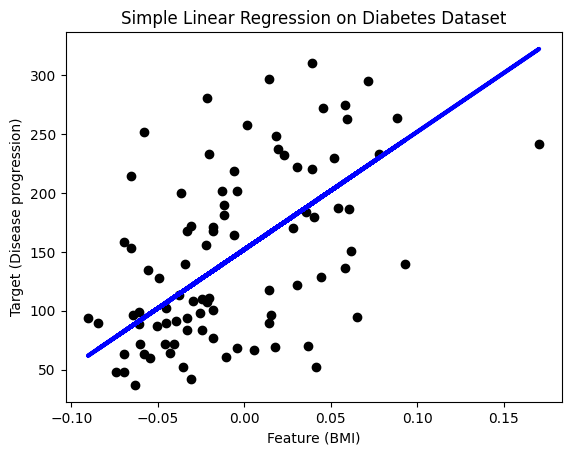

In [3]:
diabetes = load_diabetes()
X = diabetes.data[:, np.newaxis, 2] 
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xlabel('Feature (BMI)')
plt.ylabel('Target (Disease progression)')
plt.title('Simple Linear Regression on Diabetes Dataset')
plt.show()


SVM Regression

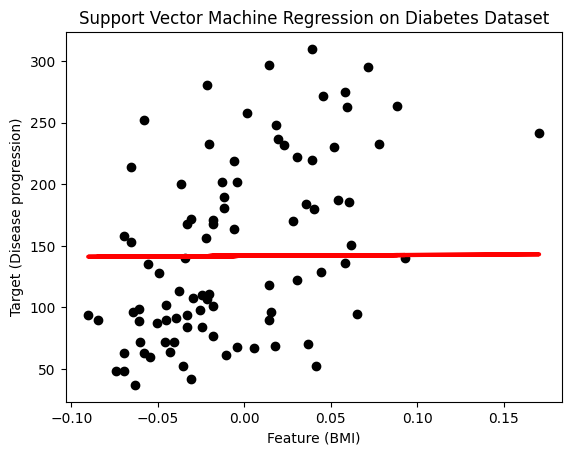

In [4]:

from sklearn.svm import SVR

svr = SVR(kernel='linear')

svr.fit(X_train, y_train)
y_svr_pred = svr.predict(X_test)

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_svr_pred, color='red', linewidth=3)

plt.xlabel('Feature (BMI)')
plt.ylabel('Target (Disease progression)')
plt.title('Support Vector Machine Regression on Diabetes Dataset')
plt.show()


Artificial Neural Network

In [5]:
pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Arzaan Ali Khan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import torch
import torch.optim as optim


diabetes = load_diabetes()
X = diabetes.data[:, np.newaxis, 2]  
y = diabetes.target


X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


class ANNModel(nn.Module):
    def __init__(self):
        super(ANNModel, self).__init__()
        self.hidden = nn.Linear(1, 100)  
        self.output = nn.Linear(100, 1)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.output(x)
        return x


model = ANNModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


num_epochs = 100
losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


plt.plot(range(num_epochs), losses, label='Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Step-wise Loss during Training')
plt.legend()
plt.show()


model.eval()
y_ann_pred = model(X_test).detach().numpy()


plt.scatter(X_test.numpy(), y_test.numpy(), color='black')
plt.scatter(X_test.numpy(), y_ann_pred, color='green', marker='x')
plt.xlabel('Feature (BMI)')
plt.ylabel('Target (Disease progression)')
plt.title('Artificial Neural Network Regression on Diabetes Dataset')
plt.show()


ImportError: cannot import name 'inf' from 'torch' (unknown location)